# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|1: Kyle Mobach|secret|
|2: Max Nes|secret|


## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
import networkx as nx
%matplotlib inline

In [3]:
from IPython.core.display import display, HTML
def queryResultToHTMLTable(queryResult):
   HTMLResult = '<table><tr style="color:white;background-color:gray;font-weight:bold">'
   # print variable names
   for varName in queryResult.vars:
       HTMLResult = HTMLResult + '<td>' + varName + '</td>'
   HTMLResult = HTMLResult + '</tr>'
   # print values from each row
   for row in queryResult:
      HTMLResult = HTMLResult + '<tr>'   
      for column in row:
         HTMLResult = HTMLResult + '<td>' + column + '</td>'
      HTMLResult = HTMLResult + '</tr>'
   HTMLResult = HTMLResult + '</table>'
   display(HTML(HTMLResult))



# Inladen van de graven

* Hier worden eerst de graven ingeladen van voorgaande weken.
* Hierbij zijn kleine aanpassingen gedaan om attributen toe te voegen zodat deze later worden begrepen door rdflib.
* Ook zijn er aan de lhbtqi+ graaf genders toegevoegd om het wat makkelijker om te kunnen zetten.

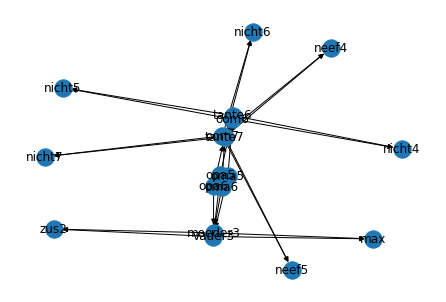

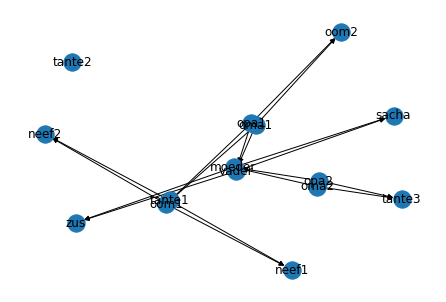

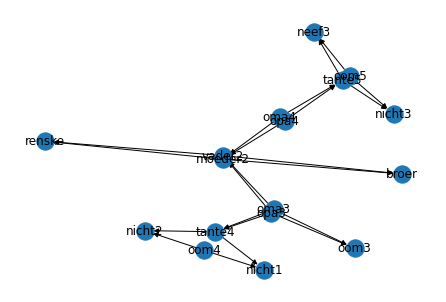

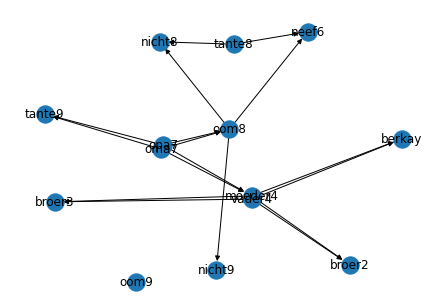

In [4]:
# Family knowledge base

G = nx.DiGraph()

# toevoegen nodes
M1,V1= {"opa1","opa2","oom1","oom2","vader","neef1","neef2","sacha"},{"oma1","oma2","tante1","tante2","moeder","tante3","zus"} 
M2,V2= {"opa3","opa4","oom3","oom4","vader2","oom5","neef3","broer"},{"oma3","oma4","tante4","tante5","moeder2","nicht1","nicht2","nicht3","renske"}
M3,V3= {"opa5","opa6","oom6","oom7","vader3","neef4","neef5","max"},{"oma5","oma6","tante6","tante7","moeder3","nicht4","nicht5","nicht6","nicht7","zus2"}
M4,V4= {"opa7","oom8","oom9","vader4","neef6","berkay","broer2","broer3"},{"oma7","tante8","tante9","moeder4","nicht8","nicht9"} 
M = set.union(M1, M2, M3, M4)
V= set.union(V1, V2, V3, V4)
G.add_nodes_from(M)
G.add_nodes_from(V)

# toevoegen edges
G.add_edges_from([("opa1","oom1"), ("opa1","oom2"), ("opa1","vader"), ("oma1","oom1"), ("oma1","oom2"), ("oma1","vader"), 
                  ("opa2","moeder"), ("opa2","tante3"), ("oma2","moeder"), ("oma2","tante3"), ("oom1","neef1"),
                  ("oom1","neef2"), ("tante1","neef1"), ("tante1","neef2"), ("vader","sacha"), ("vader","zus"), 
                  ("moeder","sacha"), ("moeder","zus")], attr="parent") # Sacha

G.add_edges_from([("opa3","oom3"), ("opa3","tante4"), ("opa3","vader2"), ("oma3","oom3"), ("oma3","tante4"), 
                  ("oma3","vader2"), ("opa4","moeder2"), ("opa4","tante5"), ("oma4","moeder2"), ("oma4","tante5"), 
                  ("oom4","nicht1"),("oom4","nicht2"), ("tante4","nicht1"), ("tante4","nicht2"), ("vader2","renske"),
                  ("vader2","broer"), ("moeder2","renske"), ("moeder2","broer"), ("oom5","neef3"),("oom5","nicht3"),
                  ("tante5","neef3"), ("tante5","nicht3")], attr="parent")# Renske

G.add_edges_from([("opa5","tante6"), ("opa5","vader3"), ("oma5","tante6"), ("oma5","vader3"), ("opa6","moeder3"), 
                  ("opa6","tante7"), ("oma6","moeder3"), ("oma6","tante7"), ("oom6","nicht4"),("oom6","nicht5"), 
                  ("tante6","nicht4"), ("tante6","nicht5"), ("vader3","max"), ("vader3","zus2"), ("moeder3","max"), 
                  ("moeder3","zus2"), ("oom7","neef4"), ("oom7","nicht6"), ("oom7","neef5"), ("oom7","nicht7"), 
                  ("tante7","neef4"), ("tante7","nicht6"), ("tante7","neef5"), ("tante7","nicht7")], attr="parent")# Max

G.add_edges_from([("opa7","tante9"), ("opa7","moeder4"), ("opa7","oom8"), ("oma7","oom8"), ("oma7","moeder4"), 
                  ("oma7","tante9"), ("oom8","nicht8"),("oom8","nicht9"), ("oom8", "neef6"), ("tante8", "neef6"),
                  ("tante8","nicht8"), ("tante8","nicht8"), ("vader4","berkay"), ("vader4","broer2"), ("vader4","broer3"), 
                  ("moeder4","berkay"), ("moeder4","broer2"), ("moeder4","broer3")], attr="parent")# Berkay


#opdelen voor plaatje in verschillende graphs, zodat er nog enigszins overzicht is
G1 = nx.DiGraph()
M5,V5= {"opa5","opa6","oom6","oom7","vader3","neef4","neef5","max"},{"oma5","oma6","tante6","tante7","moeder3","nicht4","nicht5","nicht6","nicht7","zus2"}
G1.add_nodes_from(M5)
G1.add_nodes_from(V5)
G1.add_edges_from([("opa5","tante6"), ("opa5","vader3"), ("oma5","tante6"), ("oma5","vader3"), ("opa6","moeder3"), 
                  ("opa6","tante7"), ("oma6","moeder3"), ("oma6","tante7"), ("oom6","nicht4"),("oom6","nicht5"), 
                  ("tante6","nicht4"), ("tante6","nicht5"), ("vader3","max"), ("vader3","zus2"), ("moeder3","max"), 
                  ("moeder3","zus2"), ("oom7","neef4"), ("oom7","nicht6"), ("oom7","neef5"), ("oom7","nicht7"), 
                  ("tante7","neef4"), ("tante7","nicht6"), ("tante7","neef5"), ("tante7","nicht7")])# Max
for n in M5:
    G1.nodes[n]['M']=True
    G1.nodes[n]['V']=False
for n in V5:
    G1.nodes[n]['V']=True
    G1.nodes[n]['M']=False 
    
G2 = nx.DiGraph()
M6,V6= {"opa1","opa2","oom1","oom2","vader","neef1","neef2","sacha"},{"oma1","oma2","tante1","tante2","moeder","tante3","zus"}
G2.add_nodes_from(M6)
G2.add_nodes_from(V6)
G2.add_edges_from([("opa1","oom1"), ("opa1","oom2"), ("opa1","vader"), ("oma1","oom1"), ("oma1","oom2"), ("oma1","vader"), 
                  ("opa2","moeder"), ("opa2","tante3"), ("oma2","moeder"), ("oma2","tante3"), ("oom1","neef1"),
                  ("oom1","neef2"), ("tante1","neef1"), ("tante1","neef2"), ("vader","sacha"), ("vader","zus"), 
                  ("moeder","sacha"), ("moeder","zus")]) # Sacha
for n in M6:
    G2.nodes[n]['M']=True
    G2.nodes[n]['V']=False
for n in V6:
    G2.nodes[n]['V']=True
    G2.nodes[n]['M']=False 
    
G3 = nx.DiGraph()
M7,V7= {"opa3","opa4","oom3","oom4","vader2","oom5","neef3","broer"},{"oma3","oma4","tante4","tante5","moeder2","nicht1","nicht2","nicht3","renske"}
G3.add_nodes_from(M7)
G3.add_nodes_from(V7)
G3.add_edges_from([("opa3","oom3"), ("opa3","tante4"), ("opa3","vader2"), ("oma3","oom3"), ("oma3","tante4"), 
                  ("oma3","vader2"), ("opa4","moeder2"), ("opa4","tante5"), ("oma4","moeder2"), ("oma4","tante5"), 
                  ("oom4","nicht1"),("oom4","nicht2"), ("tante4","nicht1"), ("tante4","nicht2"), ("vader2","renske"),
                  ("vader2","broer"), ("moeder2","renske"), ("moeder2","broer"), ("oom5","neef3"),("oom5","nicht3"),
                  ("tante5","neef3"), ("tante5","nicht3")])# Renske
for n in M7:
    G3.nodes[n]['M']=True
    G3.nodes[n]['V']=False
for n in V7:
    G3.nodes[n]['V']=True
    G3.nodes[n]['M']=False 
    
G4 = nx.DiGraph()
M8,V8= {"opa7","oom8","oom9","vader4","neef6","berkay","broer2","broer3"},{"oma7","tante8","tante9","moeder4","nicht8","nicht9"}
G4.add_nodes_from(M8)
G4.add_nodes_from(V8)
G4.add_edges_from([("opa7","tante9"), ("opa7","moeder4"), ("opa7","oom8"), ("oma7","oom8"), ("oma7","moeder4"), 
                  ("oma7","tante9"), ("oom8","nicht8"),("oom8","nicht9"), ("oom8", "neef6"), ("tante8", "neef6"),
                  ("tante8","nicht8"), ("tante8","nicht8"), ("vader4","berkay"), ("vader4","broer2"), ("vader4","broer3"), 
                  ("moeder4","berkay"), ("moeder4","broer2"), ("moeder4","broer3")])# Berkay
for n in M8:
    G4.nodes[n]['M']=True
    G4.nodes[n]['V']=False
for n in V8:
    G4.nodes[n]['V']=True
    G4.nodes[n]['M']=False 

# Nu even de attributen M en V goed zetten voor de hele graaf
for n in M:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
for n in V:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False 

# plaatje plotten
import matplotlib.pyplot as plt
plt.figure(1)
nx.draw(G1, with_labels=True)
plt.figure(2)
nx.draw(G2, with_labels=True)
plt.figure(3)
nx.draw(G3, with_labels=True)
plt.figure(4)
nx.draw(G4, with_labels=True)
plt.show()
G5 = G

Geel = Vrouwen, Groen = Mannen, Donkerpaars = Niet bepaald


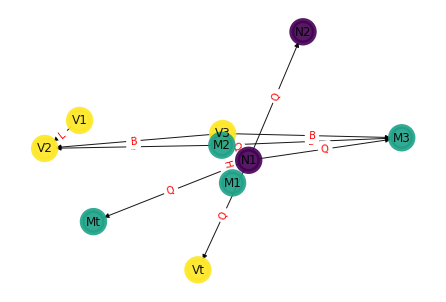

In [5]:
# LHBTI++ knowledge base

import matplotlib.pyplot as plt

print('Geel = Vrouwen,', 'Groen = Mannen,', 'Donkerpaars = Niet bepaald')
G = nx.DiGraph()
G.add_edges_from([['V1','V2'],['V3','V2'],['M2','V2'],['M2','M3'],['M1','M2'],['V3','M3'],['N1','M3'],['N1','V3'],['N1','N2'],['N1','Mt'],['N1','Vt']], attr = "likes")
M = {"M1", "M2", "M3", "Mt"}
V = {"V1", "V2", "V3", "Vt"}
Q = {"N1", "N2"}
for n in M:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
for n in V:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False 
for n in Q:
    G.nodes[n]['V']=False
    G.nodes[n]['M']=False 
    
pos = nx.spring_layout(G, k=0.9, iterations=80)
plt.figure() 
val_map = {'V1': 1.0,
           'V2': 1.0,
           'V3': 1.0,
           'Vt': 1.0,
           'M1': 0.571,
           'M2': 0.571,
           'M3': 0.571,
           'Mt': 0.571,
           'N1': 0.0,
           'N2': 0.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G,pos,edge_color='black',width=1,linewidths=5,\
node_size=500,node_color=values,alpha=0.9,\
labels={node:node for node in G.nodes()})

nx.draw_networkx_edge_labels(G,pos,edge_labels={('V1','V2'):'L',\
('M1','M2'):'H', ('M2','V2'):'B', ('M2','M3'):'B', ('V3','M3'):'B', ('V3','V2'):'B', ('N1','V3'):'Q', ('N1','M3'):'Q', ('N1','Mt'):'Q', ('N1','N2'):'Q', ('N1','Vt'):'Q'},font_color='red')
plt.axis('off')

plt.show()


# Het omzetten van graven naar rdf tripples

* Hier wordt een functie gemaakt die een gegeven graaf met de attributen M en V om kan zetten naar rdf tripples.
* Hierbij is eerst een namespace aangemaakt om gender, leuk vinden van en ouderschap te defineren.

In [6]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.namespace import FOAF, RDF
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [18]:
# networkx2RDF(G) takes any digraph G with additional node attributes and transform it to an RDF database.
# Takes Networkx Graph and Returns RDF Graph
MyFam = Namespace("http://example.org/Myfam")

def networkx2RDF(graph):

    triplelist = []
    
    for i in graph.edges.data():
        triplelist.append((i[0], i[2]['attr'], i[1]))
    
    males = []
    females = []
    queer = []

    for i in graph.nodes:
        if graph.nodes[i]['M'] == True:
            males.append(i)
        elif graph.nodes[i]['V'] == True:
            females.append(i)
        else: queer.append(i)
    
    
    g = Graph()
    g.bind("foaf", FOAF)
    MyFam.gender
    edges = list(graph.edges.data())
    
    if edges[0][2]['attr'] == 'parent':
        MyFam.parent
        
        # is ouder van
        for i in triplelist:
            g.add((URIRef(str(MyFam+str(i[0]))), MyFam.parent, URIRef(str(MyFam+str(i[2])))))
    else:
        MyFam.likes
        
        # likes
        for i in triplelist:
            g.add((URIRef(str(MyFam+str(i[0]))), MyFam.likes, URIRef(str(MyFam+str(i[2])))))


    # gender
    for i in males:
        g.add((URIRef(str(MyFam)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(MyFam)+str(i)), RDF.type, Literal('Male')))
    for i in females:
        g.add((URIRef(str(MyFam)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(MyFam)+str(i)), RDF.type, Literal('Female')))
    for i in queer:
        g.add((URIRef(str(MyFam)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(MyFam)+str(i)), RDF.type, Literal('Queer')))

    return g


In [19]:
# Family RDF
family = networkx2RDF(G5)

print(family.serialize(format="turtle").decode("utf-8"))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://example.org/> .

ns1:Myfamoma1 a "Female" ;
    ns1:Myfamparent ns1:Myfamoom1,
        ns1:Myfamoom2,
        ns1:Myfamvader ;
    foaf:name "oma1" .

ns1:Myfamoma2 a "Female" ;
    ns1:Myfamparent ns1:Myfammoeder,
        ns1:Myfamtante3 ;
    foaf:name "oma2" .

ns1:Myfamoma3 a "Female" ;
    ns1:Myfamparent ns1:Myfamoom3,
        ns1:Myfamtante4,
        ns1:Myfamvader2 ;
    foaf:name "oma3" .

ns1:Myfamoma4 a "Female" ;
    ns1:Myfamparent ns1:Myfammoeder2,
        ns1:Myfamtante5 ;
    foaf:name "oma4" .

ns1:Myfamoma5 a "Female" ;
    ns1:Myfamparent ns1:Myfamtante6,
        ns1:Myfamvader3 ;
    foaf:name "oma5" .

ns1:Myfamoma6 a "Female" ;
    ns1:Myfamparent ns1:Myfammoeder3,
        ns1:Myfamtante7 ;
    foaf:name "oma6" .

ns1:Myfamoma7 a "Female" ;
    ns1:Myfamparent ns1:Myfammoeder4,
        ns1:Myfamoom8,
        ns1:Myfamtante9 ;
    foaf:name "oma7" .

ns1:Myfamoom4 a "Male" ;
    ns1:Myfamparent ns1:M

# Sparql over de graven voor de familie relaties

* Hier zijn alle famielie relaties die op de graaf mogelijk waren omgezet in sparql.
* Er komt telkens uit welke mensen een bepaalde soort persoon zijn.

In [20]:
family.bind("foaf", FOAF)

Vaders = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?ouder FOAF:name ?name.
                                ?ouder  rdf:type ?gen.
                                FILTER (?gen = 'Male')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de vaders: ")
for i in list(Vaders):    
    print(str(i[0]))

Moeders = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?ouder FOAF:name ?name.                                 
                                ?ouder  rdf:type ?gen.
                                FILTER (?gen = 'Female')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de moeders: ")
for i in list(Moeders):    
    print(str(i[0]))
    
Dochters = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?kind FOAF:name ?name.                                 
                                ?kind  rdf:type ?gen.
                                FILTER (?gen = 'Female')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de dochters: ")
for i in list(Dochters):    
    print(str(i[0]))
    
Zonen = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?kind FOAF:name ?name.                                 
                                ?kind  rdf:type ?gen.
                                FILTER (?gen = 'Male')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de Zonen: ")
for i in list(Zonen):    
    print(str(i[0]))
    
Neven = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?grootouder m:parent ?ouder .
                                ?grootouder m:parent ?ouderb .
                                ?ouderb m:parent ?kindb.
                                ?kindb FOAF:name ?name.                                 
                                ?kindb  rdf:type ?gen.
                                FILTER (?gen = 'Male') . 
                                FILTER (?ouderb != ?ouder)}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de neven: ")
for i in list(Neven):    
    print(str(i[0]))
    
Nichten = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?grootouder m:parent ?ouder .
                                ?grootouder m:parent ?ouderb .
                                ?ouderb m:parent ?kindb .
                                ?kindb FOAF:name ?name .                                 
                                ?kindb  rdf:type ?gen .
                                FILTER (?gen = 'Female') . 
                                FILTER (?ouderb != ?ouder)}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de nichten: ")
for i in list(Nichten):    
    print(str(i[0]))

Opa = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind .
                                ?grootouder m:parent ?ouder .
                                ?grootouder FOAF:name ?name .
                                ?grootouder rdf:type ?gen .
                                FILTER (?gen = 'Male')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de opa's: ")
for i in list(Opa):    
    print(str(i[0]))

Oma = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind .
                                ?grootouder m:parent ?ouder .
                                ?grootouder FOAF:name ?name .
                                ?grootouder rdf:type ?gen .
                                FILTER (?gen = 'Female')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de oma's: ")
for i in list(Oma):    
    print(str(i[0]))
    
Kleinzoon = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind .
                                ?grootouder m:parent ?ouder .
                                ?kind FOAF:name ?name .
                                ?kind rdf:type ?gen .
                                FILTER (?gen = 'Male')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de kleinzonen: ")
for i in list(Kleinzoon):    
    print(str(i[0]))
    
Kleindochter = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind .
                                ?grootouder m:parent ?ouder .
                                ?kind FOAF:name ?name .
                                ?kind rdf:type ?gen .
                                FILTER (?gen = 'Female')}""",
        initNs = { "m": MyFam, "FOAF" : FOAF })

print("Dit zijn de kleindochters: ")
for i in list(Kleindochter):    
    print(str(i[0]))
    
Oom = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?grootouder m:parent ?ouder .
                                ?grootouder m:parent ?ouderb .
                                ?ouderb FOAF:name ?name.                                 
                                ?ouderb  rdf:type ?gen.
                                FILTER (?gen = 'Male') . 
                                FILTER (?ouderb != ?ouder) }""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de ooms: ")
for i in list(Oom):    
    print(str(i[0]))

Tante = family.query( """SELECT DISTINCT ?name 
                        WHERE { ?ouder m:parent ?kind.
                                ?grootouder m:parent ?ouder .
                                ?grootouder m:parent ?ouderb .
                                ?ouderb FOAF:name ?name.                                 
                                ?ouderb  rdf:type ?gen.
                                FILTER (?gen = 'Female') . 
                                FILTER (?ouderb != ?ouder) }""",
        initNs = { "m": MyFam, "FOAF" : FOAF })
    
print("Dit zijn de tantes: ")
for i in list(Tante):    
    print(str(i[0]))

Dit zijn de vaders: 
vader3
opa1
vader4
oom4
opa7
opa2
oom1
opa4
opa3
oom8
vader2
oom7
opa5
oom5
oom6
vader
opa6
Dit zijn de moeders: 
moeder3
oma3
tante7
moeder
oma6
oma2
moeder4
tante1
moeder2
oma7
oma5
oma4
tante8
tante4
tante5
oma1
tante6
Dit zijn de dochters: 
zus2
nicht6
moeder4
tante9
tante5
nicht3
moeder2
tante7
nicht8
nicht5
moeder3
nicht2
tante3
nicht1
tante4
nicht7
moeder
zus
tante6
renske
nicht4
nicht9
Dit zijn de Zonen: 
vader3
neef1
neef6
oom1
broer3
berkay
oom3
broer
broer2
neef4
neef3
neef2
neef5
vader2
sacha
vader
oom2
oom8
max
Dit zijn de neven: 
max
neef2
broer2
broer
neef6
neef5
neef1
neef3
broer3
berkay
sacha
neef4
Dit zijn de nichten: 
nicht6
renske
nicht1
zus2
nicht2
nicht9
nicht5
nicht8
zus
nicht3
nicht4
nicht7
Dit zijn de opa's: 
opa1
opa4
opa2
opa5
opa7
opa3
opa6
Dit zijn de oma's: 
oma3
oma6
oma2
oma7
oma5
oma4
oma1
Dit zijn de kleinzonen: 
max
sacha
neef2
broer2
broer
neef6
neef5
neef1
neef3
broer3
berkay
neef4
Dit zijn de kleindochters: 
nicht6
renske
nicht

In [21]:
# LHBTI++ RDF
lhbti = networkx2RDF(G)
print(lhbti.serialize(format="turtle").decode("utf-8"))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://example.org/> .

ns1:MyfamM1 a "Male" ;
    ns1:Myfamlikes ns1:MyfamM2 ;
    foaf:name "M1" .

ns1:MyfamN1 a "Queer" ;
    ns1:Myfamlikes ns1:MyfamM3,
        ns1:MyfamMt,
        ns1:MyfamN2,
        ns1:MyfamV3,
        ns1:MyfamVt ;
    foaf:name "N1" .

ns1:MyfamV1 a "Female" ;
    ns1:Myfamlikes ns1:MyfamV2 ;
    foaf:name "V1" .

ns1:MyfamM2 a "Male" ;
    ns1:Myfamlikes ns1:MyfamM3,
        ns1:MyfamV2 ;
    foaf:name "M2" .

ns1:MyfamMt a "Male" ;
    foaf:name "Mt" .

ns1:MyfamN2 a "Queer" ;
    foaf:name "N2" .

ns1:MyfamV3 a "Female" ;
    ns1:Myfamlikes ns1:MyfamM3,
        ns1:MyfamV2 ;
    foaf:name "V3" .

ns1:MyfamVt a "Female" ;
    foaf:name "Vt" .

ns1:MyfamM3 a "Male" ;
    foaf:name "M3" .

ns1:MyfamV2 a "Female" ;
    foaf:name "V2" .




In [11]:
# Family Graph
# Maak SPARQL queries voor al je gedefinieerde relaties.
# Check dat de antwoorden identiek zijn.

qres = family.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:10]

(rdflib.plugins.sparql.processor.SPARQLResult,
 209,
 [(rdflib.term.URIRef('http://example.org/Myfammoeder3'),
   rdflib.term.URIRef('http://example.org/Myfamparent'),
   rdflib.term.URIRef('http://example.org/Myfammax')),
  (rdflib.term.URIRef('http://example.org/Myfamopa5'),
   rdflib.term.URIRef('http://example.org/Myfamparent'),
   rdflib.term.URIRef('http://example.org/Myfamvader3')),
  (rdflib.term.URIRef('http://example.org/Myfamvader2'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('Male')),
  (rdflib.term.URIRef('http://example.org/Myfammax'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('Male')),
  (rdflib.term.URIRef('http://example.org/Myfamtante7'),
   rdflib.term.URIRef('http://example.org/Myfamparent'),
   rdflib.term.URIRef('http://example.org/Myfamnicht7')),
  (rdflib.term.URIRef('http://example.org/Myfamtante3'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name

In [12]:
# LHBTI++ Graph
# Maak SPARQL queries voor al je gedefinieerde relaties.
# Check dat de antwoorden identiek zijn.

qres = lhbti.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:10]

(rdflib.plugins.sparql.processor.SPARQLResult,
 31,
 [(rdflib.term.URIRef('http://example.org/MyfamN1'),
   rdflib.term.URIRef('http://example.org/Myfamlikes'),
   rdflib.term.URIRef('http://example.org/MyfamV3')),
  (rdflib.term.URIRef('http://example.org/MyfamN2'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
   rdflib.term.Literal('N2')),
  (rdflib.term.URIRef('http://example.org/MyfamN1'),
   rdflib.term.URIRef('http://example.org/Myfamlikes'),
   rdflib.term.URIRef('http://example.org/MyfamN2')),
  (rdflib.term.URIRef('http://example.org/MyfamV2'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
   rdflib.term.Literal('V2')),
  (rdflib.term.URIRef('http://example.org/MyfamV2'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('Female')),
  (rdflib.term.URIRef('http://example.org/MyfamV1'),
   rdflib.term.URIRef('http://example.org/Myfamlikes'),
   rdflib.term.URIRef('http://example.org/MyfamV2')),
  (rdflib.term.

In [13]:
# Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

In [14]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=N88084c47c9c144b5823dce45702ac49d (<class 'rdflib.graph.Graph'>)>

In [15]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/2014_MTV_Video_Music_Awards'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/New_wave_of_British_heavy_metal'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [16]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:10]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/2014_MTV_Video_Music_Awards'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/New_wave_of_British_heavy_metal'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Tony_Swatton'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Academy_Fantasia_(season_6)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Leste

# Het terug programmeren van een rdf source naar een graaf

* Eerst wordt er hier een database geimporteert.
* Daarna wordt deze database omgezet in een graaf doormiddel van een rdflib functie.

211
233
0.005258406680207628


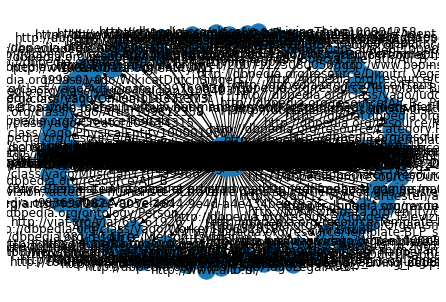

In [17]:
g=Graph()
g.parse('http://dbpedia.org/resource/Ali_B')

# Hiermee maak je een networkx graph van een RDF graph.
from rdflib.extras.external_graph_libs import *
nx_graph = rdflib_to_networkx_digraph(g)
nx.draw(nx_graph, with_labels=True)

# Wat netwerk maten
print(nx.number_of_nodes(nx_graph))
print(nx.number_of_edges(nx_graph))
print(nx.density(nx_graph))